In [1]:
# Exploratory Data Analysis 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# check for required file

import os
from pathlib import Path

FILE_PATH = '../data/NYPD_Complaint_Data_Historic_Cleaned_Reduced_Mapped.csv'

file_path = Path(FILE_PATH)

# Check if the file exists
if file_path.exists():
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}. Please ensure the file is downloaded correctly.")

File found: ../data/NYPD_Complaint_Data_Historic_Cleaned_Reduced_Mapped.csv


In [3]:
# Load the dataset
import pandas as pd
import numpy as np

complaints_df = pd.read_csv(FILE_PATH)

complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588789 entries, 0 to 1588788
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   OFNS_DESC                 1588789 non-null  object 
 1   BORO_NM                   1588789 non-null  object 
 2   PREM_TYP_DESC             1588789 non-null  object 
 3   Latitude                  1588789 non-null  float64
 4   Longitude                 1588789 non-null  float64
 5   VIC_AGE_GROUP             1588789 non-null  object 
 6   VIC_RACE                  1588789 non-null  object 
 7   VIC_SEX                   1588789 non-null  object 
 8   Hour                      1588789 non-null  float64
 9   OFNS_DESC_Severity_Score  1588789 non-null  int64  
 10  Crime_Category            1588789 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 133.3+ MB


In [4]:
complaints_df.head()

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score,Crime_Category
0,ROBBERY,BROOKLYN,STREET,40.701593,-73.948747,<18,WHITE,M,19.0,8,Violent Crimes
1,RAPE,MANHATTAN,STREET,40.737203,-73.983273,<18,BLACK,F,23.0,10,Violent Crimes
2,RAPE,BRONX,HOSPITAL,40.810352,-73.924942,<18,BLACK,F,23.0,10,Violent Crimes
3,FELONY ASSAULT,QUEENS,OTHER,40.593680,-73.790074,25-44,WHITE,F,12.0,9,Violent Crimes
4,ROBBERY,BRONX,STREET,40.859853,-73.894368,<18,BLACK HISPANIC,M,20.0,8,Violent Crimes


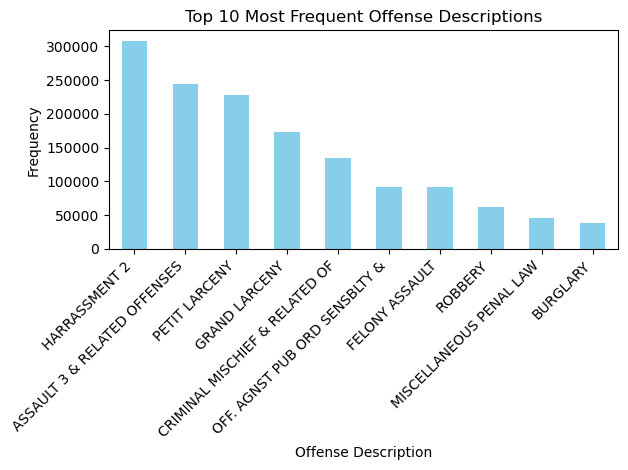

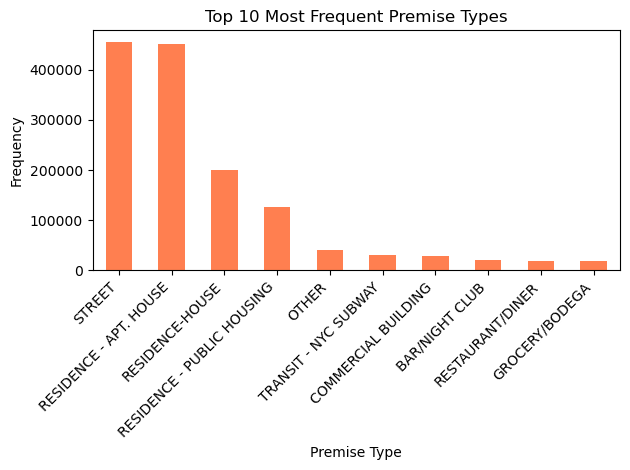

In [5]:
# Plotting top 10 most frequent Offense Descriptions
top_ofns_desc = complaints_df['OFNS_DESC'].value_counts().head(10)
top_ofns_desc.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Offense Descriptions')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Plotting top 10 most frequent Premise Types
top_prem_typ_desc = complaints_df['PREM_TYP_DESC'].value_counts().head(10)
top_prem_typ_desc.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Premise Types')
plt.xlabel('Premise Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

Chi-Square Statistic: 106428.06531689744
p-value: 0.0


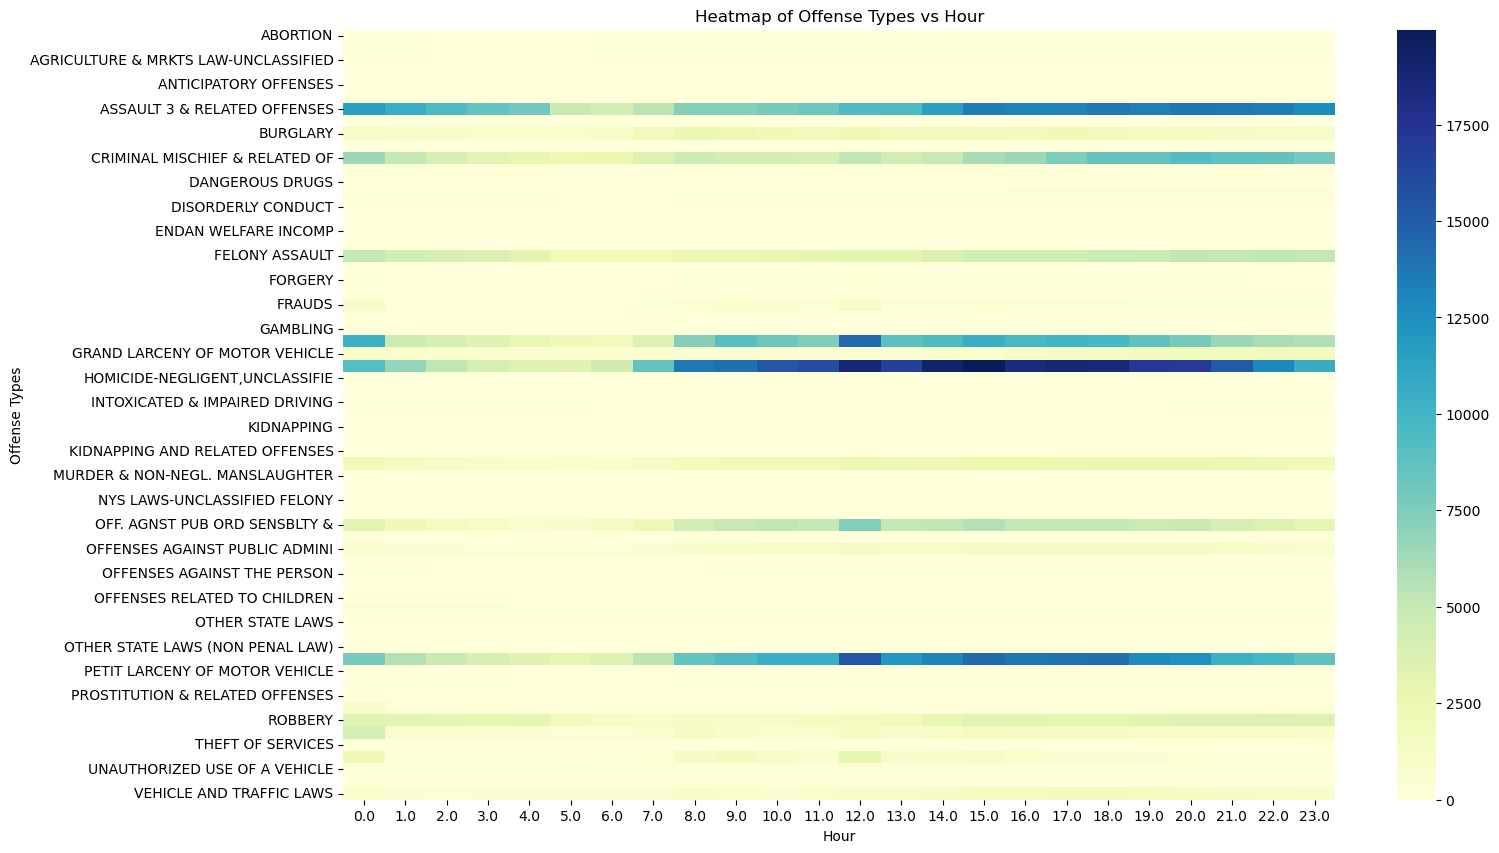

In [6]:
# Hypothesis: The occurrence of offenses (OFNS_DESC) is independent of the time of day (CMPLNT_FR_TM).
# This hypothesis examines whether certain types of crimes are more likely to occur at specific times of the day. 
# If rejected, it could suggest that some crimes are more prevalent during certain hours.
# Create a contingency table of OFNS_DESC vs Hour
contingency_table = pd.crosstab(complaints_df['OFNS_DESC'], complaints_df['Hour'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

# Creating the heatmap from the contingency table
plt.figure(figsize=(16, 10))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, fmt="d")
plt.title('Heatmap of Offense Types vs Hour')
plt.xlabel('Hour')
plt.ylabel('Offense Types')
plt.show()

In [7]:
# p-value is low: this means there is a statistically significant relationship
# data suggests that the type of offense is not independent of the time of day it occurs; 
# certain offenses are more likely to occur at specific times.